In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [ ]:
from keras.api._v2.keras import activations
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPool2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 dense_8 (Dense)             (None, 100)              

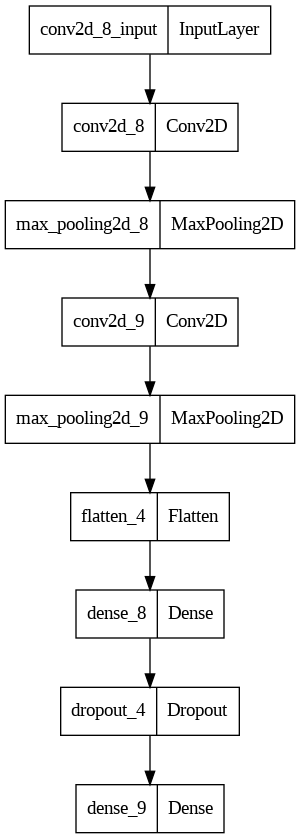

In [ ]:
keras.utils.plot_model(model)

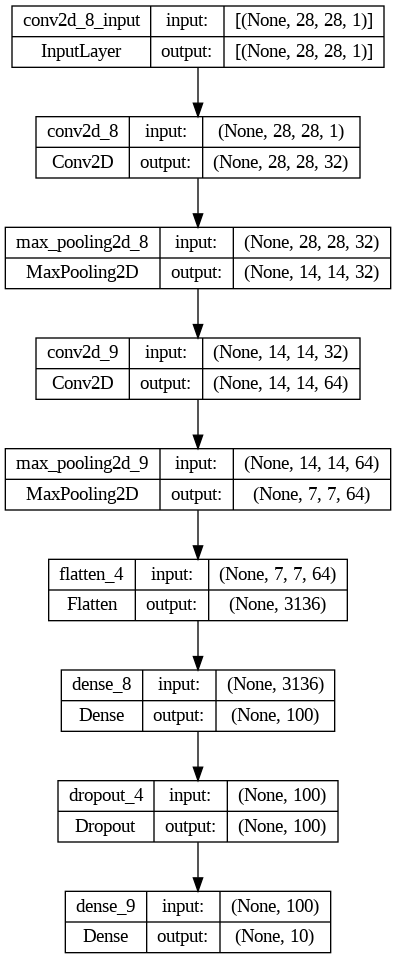

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
from sklearn.utils import validation
from keras.engine.training import optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=100, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1500/1500 [==============================] - 9s 5ms/step - loss: 0.5390 - accuracy: 0.8072 - val_loss: 0.3465 - val_accuracy: 0.8742
Epoch 2/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3606 - accuracy: 0.8724 - val_loss: 0.2810 - val_accuracy: 0.8982
Epoch 3/100
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3081 - accuracy: 0.8895 - val_loss: 0.2637 - val_accuracy: 0.9027
Epoch 4/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2769 - accuracy: 0.9004 - val_loss: 0.2550 - val_accuracy: 0.9034
Epoch 5/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2536 - accuracy: 0.9081 - val_loss: 0.2340 - val_accuracy: 0.9143
Epoch 6/100
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2342 - accuracy: 0.9148 - val_loss: 0.2267 - val_accuracy: 0.9176
Epoch 7/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2158 - accuracy: 0.9211 - val_loss: 0.2325 - val_ac

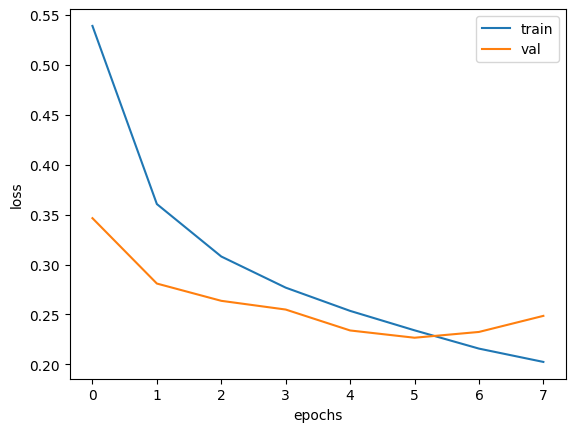

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 4ms/step - loss: 0.2267 - accuracy: 0.9176


[0.2267298400402069, 0.9175833463668823]

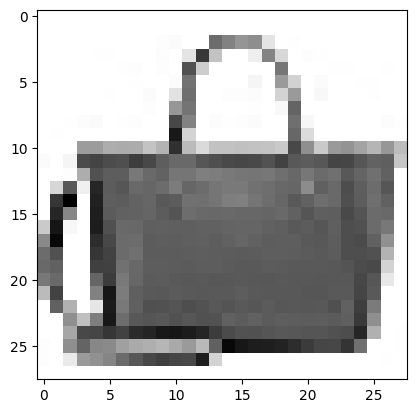

In [ ]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [ ]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 152ms/step
[[5.1777523e-15 4.8636322e-18 5.9535292e-17 2.0444433e-16 1.1224184e-16
  2.0557225e-14 9.8789728e-16 2.2534058e-15 1.0000000e+00 1.5562028e-16]]


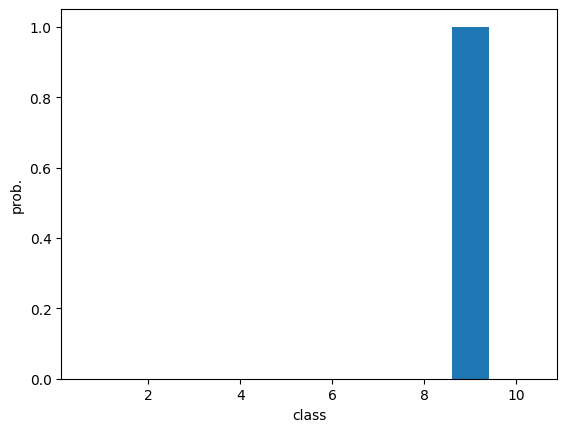

In [ ]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [ ]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [ ]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [ ]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2469 - accuracy: 0.9130


[0.24686479568481445, 0.9129999876022339]